In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_clean.csv', index_col=0)

In [3]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [5]:
data.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [6]:
data.shape

(158, 9)

In [7]:
data.size

1422

In [8]:
data.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [9]:
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [10]:
data.isnull()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Temp C      0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [12]:
data.isnull().any(axis=0)

Ozone       True
Solar.R     True
Wind       False
Temp C     False
Month      False
Day        False
Year       False
Temp       False
Weather     True
dtype: bool

In [13]:
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [14]:
data['Temp C'] =  pd.to_numeric(data['Temp C'], errors = 'coerce')
data['Temp C'].dtype

dtype('float64')

In [15]:
data['Month'] = pd.to_numeric(data['Month'], errors = 'coerce')
data['Month'].dtype

dtype('float64')

In [16]:
data['Weather']=data['Weather'].astype('category')
data['Weather'].dtype

CategoricalDtype(categories=['C', 'PS', 'S'], ordered=False)

In [17]:
data.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp C      float64
Month       float64
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

In [18]:
data.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [19]:
data[data.duplicated()].shape

(1, 9)

In [20]:
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [21]:
data_cleaned1 = data.drop_duplicates()

In [22]:
data_cleaned1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [23]:
data_cleaned1[data_cleaned1.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [24]:
data_cleaned1.shape

(157, 9)

In [25]:
data_cleaned2=data_cleaned1.drop(['Temp C'], axis=1)

In [26]:
data_cleaned2.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S


In [27]:
#rename
data_cleaned3=data_cleaned2.rename({'Solar.R':'Solar'},axis=1)

In [28]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


<AxesSubplot:>

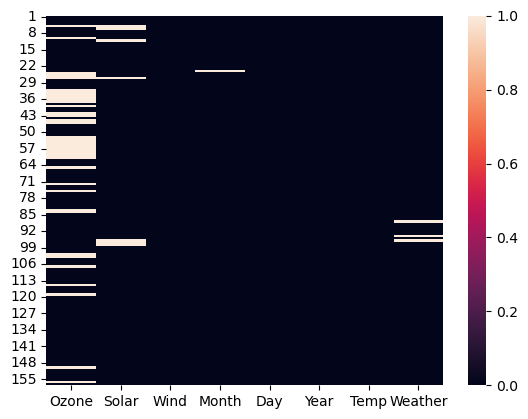

In [29]:
import seaborn as sns
col = data_cleaned3.columns
sns.heatmap(data_cleaned3.isnull())

<AxesSubplot:>

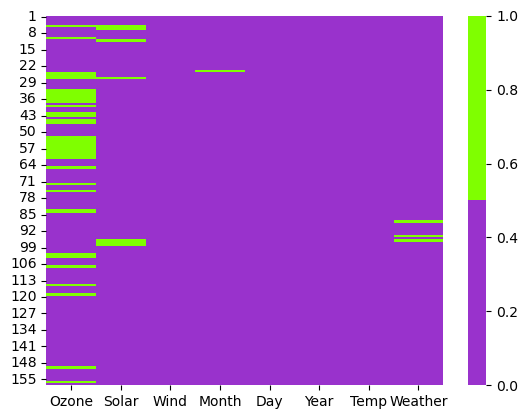

In [30]:
import seaborn as sns
cols  = data_cleaned3.columns
colours = ['#9932CC','#7FFF00']
sns.heatmap(data_cleaned3[cols].isnull(),cmap=sns.color_palette(colours))

<AxesSubplot:>

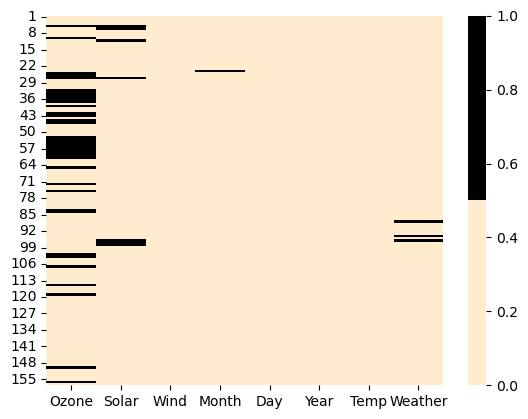

In [31]:
import seaborn as sns
cols = data_cleaned3.columns
sns.heatmap(data_cleaned3[cols].isnull(),
           cmap=sns.color_palette(['#FFEBCD','#000000']))

In [32]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C
25,NaN,66.0,16.6,5.0,25,2010,57,PS
26,NaN,266.0,14.9,5.0,26,2010,58,C
27,NaN,NaN,8.0,5.0,27,2010,57,PS
32,NaN,286.0,8.6,6.0,1,2010,78,S
33,NaN,287.0,9.7,6.0,2,2010,74,C


### Imputation

In [33]:
data_cleaned3['Ozone']=data_cleaned3['Ozone'].fillna(data_cleaned3['Ozone'].mean())

In [34]:
data_cleaned3['Ozone'].head(10)

1     41.000000
2     36.000000
3     12.000000
4     18.000000
5     41.815126
6     28.000000
7     23.000000
8     19.000000
9      8.000000
10    41.815126
Name: Ozone, dtype: float64

In [35]:
#or
mean_solar  = data_cleaned3['Solar'].mean()
data_cleaned3['Solar']=data_cleaned3['Solar'].fillna(mean_solar)

In [36]:
data_cleaned3['Solar'].isnull().sum()

0

In [37]:
obj_columns = data_cleaned3[['Weather']]
obj_columns = obj_columns.fillna(obj_columns.mode().iloc[0])
#why iloc[0]?
#whenever we use mode functn it may be more than 1 equal number of mode value,so in that values we are taking the first value

In [38]:
obj_columns.mode()

,Weather
0,S


In [39]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [40]:
month_columns = data_cleaned3[['Month']]

In [41]:
month_columns.mode()

,Month
0,9.0


In [42]:
month_columns = month_columns.fillna(month_columns.mode().iloc[0])

In [43]:
month_columns.isnull().sum()

Month    0
dtype: int64

In [44]:
data_cleaned3.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

<AxesSubplot:>

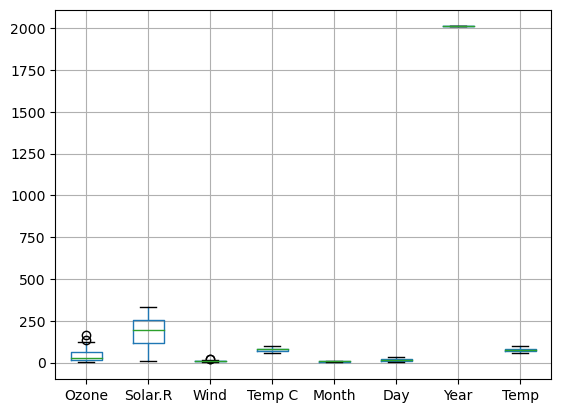

In [45]:
data.boxplot()

<AxesSubplot:>

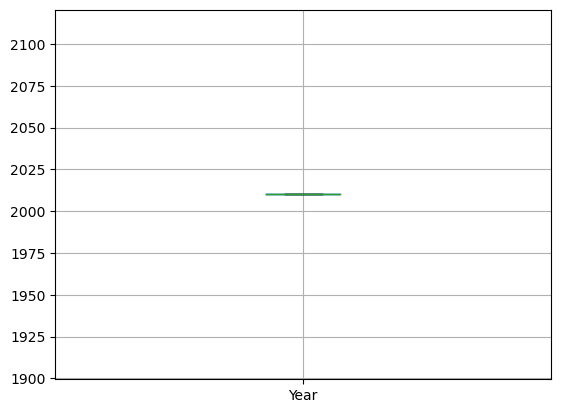

In [46]:
data[['Year']].boxplot()

In [47]:
data_cleaned3.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [48]:
data_cleaned4 = data_cleaned3.drop('Weather',axis=1)
#otherwise weather will get two times

In [49]:
data_cleaned4 = pd.concat([data_cleaned4,obj_columns],axis=1)

In [50]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [51]:
data_cleaned5=data_cleaned4.drop('Month',axis=1)

In [52]:
data_cleaned5=pd.concat([data_cleaned5,month_columns],axis=1)

In [53]:
data_cleaned5.isnull().sum()

Ozone      0
Solar      0
Wind       0
Day        0
Year       0
Temp       0
Weather    0
Month      0
dtype: int64

<AxesSubplot:>

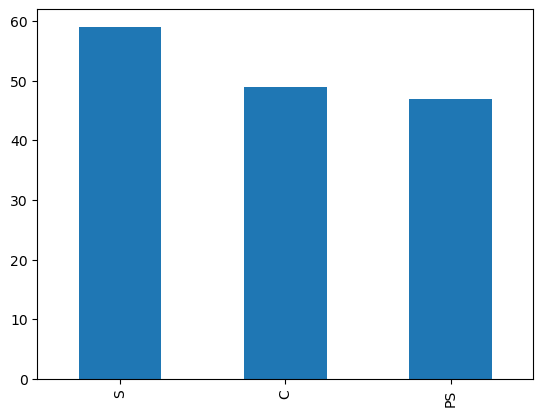

In [54]:
data['Weather'].value_counts().plot.bar()

<AxesSubplot:>

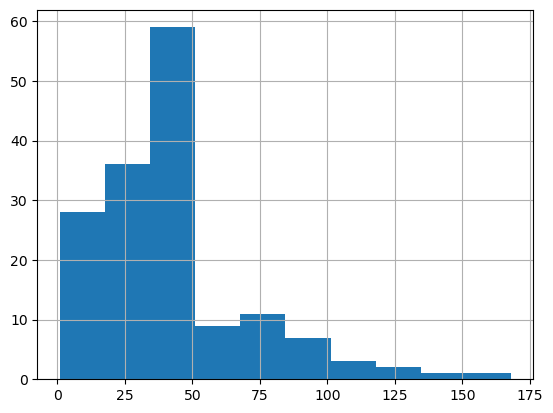

In [55]:
data_cleaned5['Ozone'].hist()

## Scatter plot and Correlation analysis

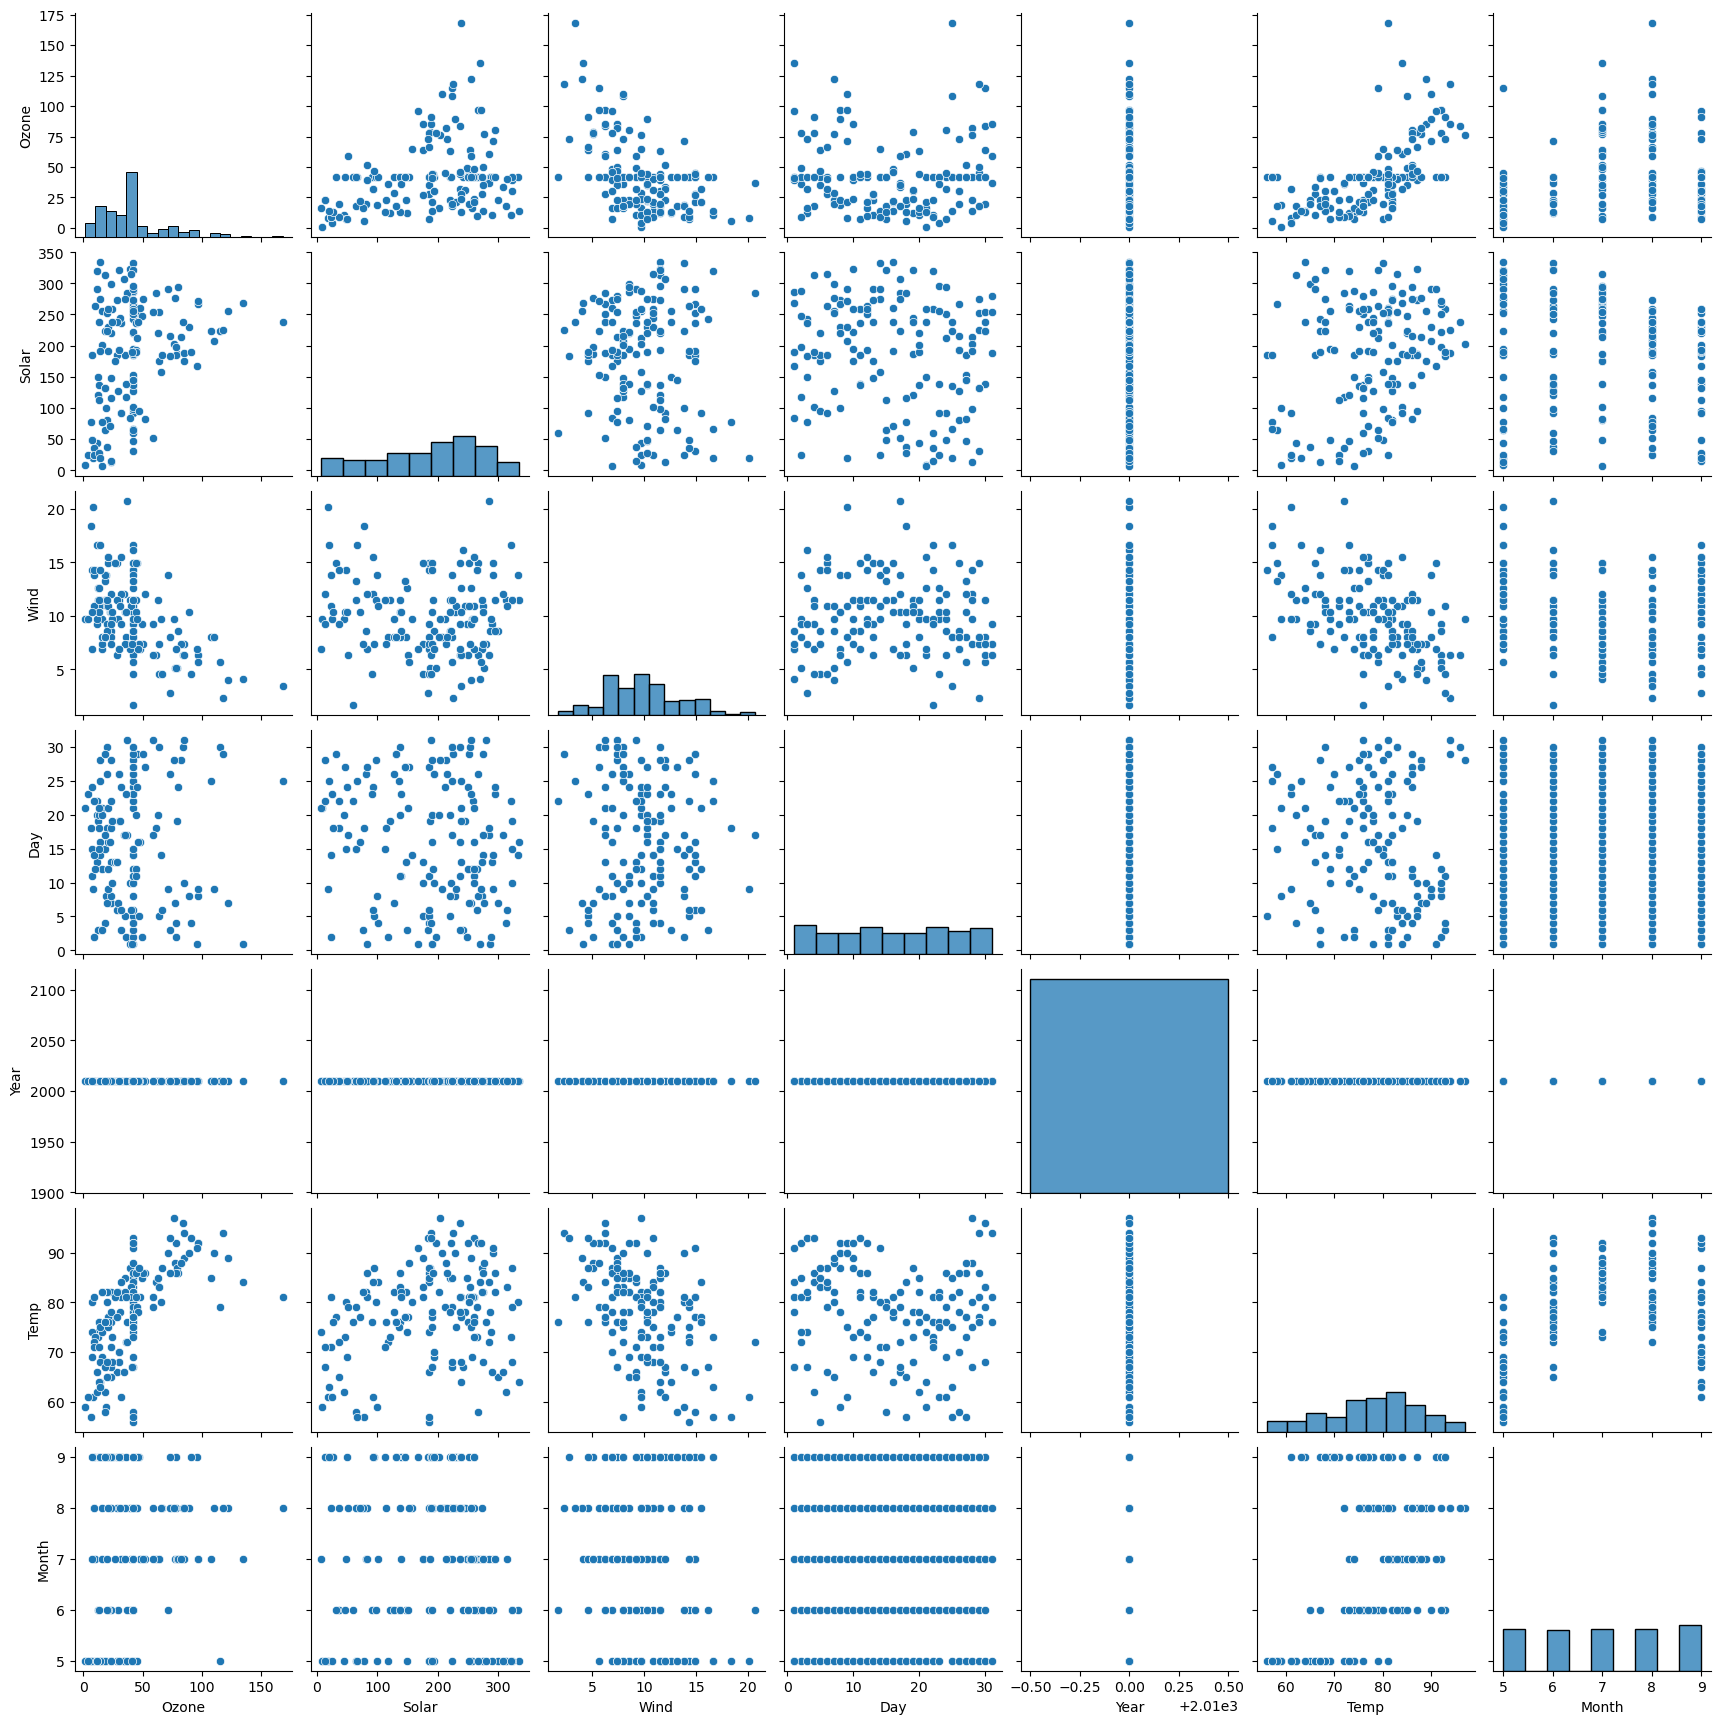

In [56]:
import seaborn as sns
sns.pairplot(data_cleaned5)

In [57]:
data_cleaned5.corr()
#why year is NAN becz year is only 1 value

,Ozone,Solar,Wind,Day,Year,Temp,Month
Ozone,1.000000,0.304559,-0.520004,-0.021916,NaN,0.606500,0.128969
Solar,0.304559,1.000000,-0.055874,-0.151007,NaN,0.260677,-0.099461
Wind,-0.520004,-0.055874,1.000000,0.029900,NaN,-0.441228,-0.159834
Day,-0.021916,-0.151007,0.029900,1.000000,NaN,-0.122787,0.057536
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,-0.122787,NaN,1.000000,0.376382
Month,0.128969,-0.099461,-0.159834,0.057536,NaN,0.376382,1.000000


## Speed up the EDA Process

In [58]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report2.html')
#in jupiter not book can't get EDA report by pandas profiling

NameError: name 'pp' is not defined

In [ ]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')